# 선형 변환의 응용

## Computer graphics

컴퓨터 그래픽은 기본적으로 꼭짓점(모서리)으로 정의되는 삼각형이나 사각형과 같은 수많은 기본 기하학적 도형으로 구성됩니다. 이러한 도형을 효율적으로 조작하는 능력은 컴퓨터 그래픽 분야에서 기본적으로 필요한 능력입니다. 선형 변환은 전단 및 반사와 같은 효과를 통해 기본 도형에서 복잡한 도형을 생성하는 데 사용할 수 있으며, 애니메이션 장면에 필요한 이미지 시퀀스를 생성하기 위해 도형을 회전 및 변환하는 데에도 사용할 수 있습니다.

최신 비디오 게임에서 3차원 장면을 렌더링하는 소프트웨어는 애니메이션의 각 프레임에서 수백만 개의 정점 좌표를 처리해야 합니다. 소프트웨어를 실행하는 데 사용되는 일반적인 하드웨어는 초당 약 60프레임을 생성할 수 있습니다. 장면에 정점을 배치하는 것 외에도 색상과 음영을 제공하고 3차원 장면을 2차원 화면에 투사하는 등의 다른 계산이 필요합니다. 이러한 맥락에서 알고리즘, 소프트웨어, 하드웨어의 효율성은 모두 최종 결과물의 품질에 중요한 역할을 합니다. 

컴퓨터 그래픽의 좌표를 조작하기 위해 행렬 곱셈을 사용하면 두 가지 주요 이점이 있습니다. 행렬 표현은 여러 변환을 단일 변환으로 병합하는 데 사용할 수 있습니다. 예를 들어, 회전과 배율 변환을 적용하는 대신 앞서 한 것처럼 관련 행렬을 곱하면 두 연산을 단일 연산으로 쉽게 병합할 수 있습니다. 행렬 곱셈으로 연산을 구성할 때의 또 다른 장점은 전용 하드웨어(그래픽 처리 장치)가 이러한 연산을 대량으로 처리하도록 특별히 설계되었다는 점입니다.

회전, 반사, 전단을 수행하기 위한 행렬의 구성은 이미 [평면 변환](21_Planar_Transformations.ipynb)에서 설명한 바 있습니다. 여기서는 선형 변환이 아닌 변환을 수행하기 위해 행렬 곱셈을 사용하는 방법을 보여드리겠습니다.

## Translation

**변환**은 모든 점을 같은 방향으로 같은 양만큼 이동시키는 변환입니다. 아래는 모든 점이 $T:\mathbb{R}^2 \to \mathbb{R}^2$ 변환에 의해 오른쪽으로 3단위 이동(변환)하고 1단위 위로 이동하는 예입니다. 그림에서는 도형을 정의하는 여러 점과 변환 아래 해당 이미지를 표시합니다.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

coords = np.array([[0,0],[0,3],[1,3],[1,1],[2,1],[2,0],[0,0]])
coords = coords.transpose()

x = coords[0,:]
y = coords[1,:]

## Compute translation by adding 3 to x coordinates and 1 to y coordinates
x_translated = np.copy(x)
y_translated = np.copy(y)

for i in range(x.shape[0]):
 x_translated[i] += 3
 y_translated[i] += 1

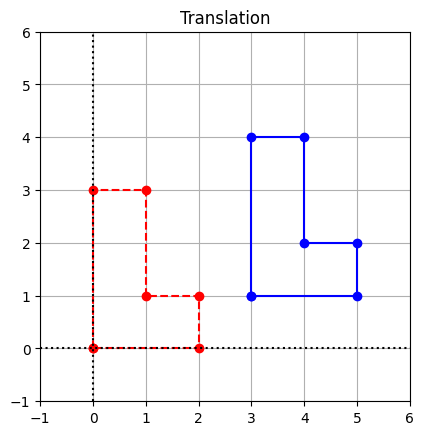

In [7]:
# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the points.
ax.plot(x,y,'ro')
ax.plot(x_translated,y_translated,'bo')

# Connect the points by lines
ax.plot(x,y,'r',ls="--")
ax.plot(x_translated,y_translated,'b')

# Edit some settings 
ax.axvline(x=0,color="k",ls=":")
ax.axhline(y=0,color="k",ls=":")
ax.grid(True)
ax.axis([-1,6,-1,6])
ax.set_aspect('equal')
ax.set_title("Translation");

좌표 변환은 컴퓨터 그래픽에서 유용하지만 선형 변환은 아닙니다. 그 이유를 알아보기 위해 벡터 $X$의 이미지에 대한 공식을 작성한 다음 임의의 벡터 $X$와 $Y$에 대해 $T(X+Y)가 \neq T(X)+T(Y)$임을 확인합니다.

$$
\begin{matrix}
T(X) = X + \left[ \begin{array}{r} 3 \\ 1 \end{array} \right]
\end{matrix}
$$

$$
\begin{matrix}
T(X+Y) = (X + Y) + \left[ \begin{array}{r} 3 \\ 1 \end{array} \right]
\end{matrix}
$$

$$
\begin{matrix}
T(X) + T(Y) = X + \left[ \begin{array}{r} 3 \\ 1 \end{array} \right] + Y + \left[ \begin{array}{r} 3 \\ 1 \end{array} \right]
= (X + Y) + \left[ \begin{array}{r} 6 \\ 2 \end{array} \right]
\end{matrix}
$$

$T$가 선형이 아니라는 사실은 이 변환이 현재 상태에서는 행렬 곱셈으로 표현될 수 없음을 의미합니다.

변환을 사용해야 하기 때문에 행렬 곱셈과 관련 이점을 통합하기 위한 표준 방법이 개발되었습니다. 이 방법을 사용하려면 $\mathbb{R}^2$를 $\mathbb{R}^3$ 내의 평면으로 간주해야 합니다. 그런 다음 해당 평면 내에서 *변환의 효과*를 갖는 선형 변환 $L:\mathbb{R}^3 \to \mathbb{R}^3$로 구성할 수 있습니다. 위에서 정의한 변환에 대한 세부 사항을 보여드리겠습니다. 

먼저, $\mathbb{R}^2$에 있는 한 점의 좌표 $(x_1,x_2)$를 $x_3=1$ 평면에서 $\mathbb{R}^3$에 있는 한 점의 좌표 $(x_1,x_2,1)$와 연관시킵니다. 이러한 새로운 좌표를 *동질 좌표*라고 합니다. 그런 다음 $x_1x_2$ 평면에 평행하고 원하는 변환 방향으로 전단을 나타내는 선형 변환 $L:\mathbb{R}^3 \to \mathbb{R}^3$을 생성할 수 있습니다. L$이 $x_3=1$ 평면의 점에 미치는 영향은 $x_3=1$ 평면 내에서의 이동입니다. 여기서 $A$는 다음과 같은 행렬로 $L(X)=AX$를 정의합니다.

$$
\begin{matrix}
A = \left[ \begin{array}{rrr} 1 & 0 & 3 \\ 0 & 1 & 1 \\ 0 & 0 & 1 \end{array} \right]
\end{matrix}
$$

$A$의 열은 표준 기저 벡터 $\{E_1, E_2, E_3\}$의 이미지라는 것을 기억합니다. 이 경우 $E_1$과 $E_2$는 변하지 않고, $E_3$은 원하는 방향으로 전단됩니다. 우리는 $L$이 의도한 효과를 낸다는 것을 관찰합니다.

$$
\begin{matrix}
L(X) = AX = \left[ \begin{array}{rrr} 1 & 0 & 3 \\ 0 & 1 & 1 \\ 0 & 0 & 1 \end{array} \right]
\left[ \begin{array}{r} x_1 \\ x_2 \\ 1 \end{array} \right] = 
\left[ \begin{array}{c} x_1+3 \\ x_2+1 \\ 1 \end{array} \right]
\end{matrix}
$$

마지막으로, 좌표 $(x_1+3, x_2+1)$를 갖는 $\mathbb{R}^2$의 점을 $L(X)$와 연결합니다.
이제 행렬 곱셈을 사용하는 NumPy로 수정된 계산을 살펴보겠습니다.

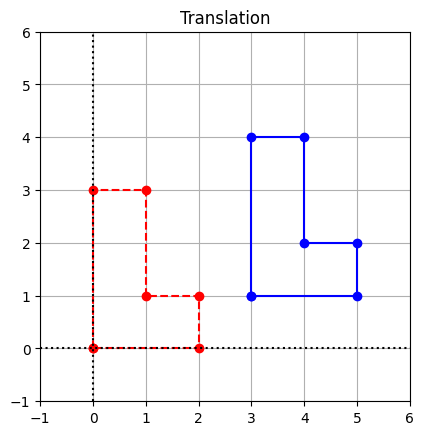

In [8]:
# Form a matrix of coordinates with rows x, y, 1
Ones = np.ones((1,7))
coords = np.vstack((x,y,Ones))

# Define the matrix for the transfomation L
A = np.array([[1,0,3],[0,1,1],[0,0,1]])

## Compute translation by matrix multiplication
coords_translated = A@coords

## Slice off the first and second rows. These are the coords of the translated points
x_translated = coords_translated[0,:]
y_translated = coords_translated[1,:]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the points.
ax.plot(x,y,'ro')
ax.plot(x_translated,y_translated,'bo')

# Connect the points by lines
ax.plot(x,y,'r',ls="--")
ax.plot(x_translated,y_translated,'b')

# Edit some settings 
ax.axvline(x=0,color="k",ls=":")
ax.axhline(y=0,color="k",ls=":")
ax.grid(True)
ax.axis([-1,6,-1,6])
ax.set_aspect('equal')
ax.set_title("Translation");

계산을 자세히 살펴보면, 변환된 도형의 좌표를 계산하는 이 방법은 배열을 통해 직접 좌표를 조작했던 첫 번째 시도보다 실제로 *더 많은 연산*이 필요하다는 것을 알 수 있습니다. 그러나 기억해야 할 중요한 점은 변환을 행렬 곱셈으로 표현할 수 있다는 것은 회전과 같은 다른 연산과 병합하여 단일 행렬을 곱하여 두 연산을 모두 수행할 수 있다는 것을 의미합니다.

3차원에서 도형의 이동도 비슷한 방식으로 $\mathbb{R}^3$의 각 좌표 집합 $(x_1, x_2, x_3)$을 $\mathbb{R}^4$의 점 $(x_1, x_2, x_3, 1)$과 연관시켜서 수행할 수 있습니다.

## 이산 동적 시스템

이전 장에서 살펴본 것처럼, 여러 구성 요소가 있는 구조를 하나의 벡터로 설명하는 것이 유용할 때가 많습니다. 어떤 프로세스로 인해 구조가 시간에 따라 변화하는 경우, 특정 시점의 구조의 *상태*를 설명하기 때문에 이 벡터를 **상태 벡터**라고 부르는 것이 일반적입니다. 이러한 동적 프로세스를 불연속적인 시간에 모델링하고 선형 변환을 사용하여 한 시간에서 다음 시간으로의 상태 벡터의 진화를 모델링하는 것은 매우 일반적입니다.

$t=0, 1, 2, 3,...$ 시점의 상태 벡터 $X_0$, $X_1$, $X_2$, $X_3$.... 을 사용하여 일련의 벡터를 설명하고자 한다고 가정해 보겠습니다. 우리는 이전 상태 벡터 $X_{t-1}$만을 기반으로 상태 벡터 $X_t$를 계산할 것을 제안합니다. 선형 변환을 통해 $X_{t-1}$에서 $X_t$로의 전환을 모델링하면 $X_t = AX_{t-1}$가 되는 행렬이 존재합니다. 이러한 종류의 모델을 **이산 동역학 시스템**이라고 하며, 경제학에서 생물학에 이르기까지 다양한 분야에서 사용됩니다.

$$
\begin{matrix}
s_t & = & 0.95s_{t-1} \hspace{2cm} + 0.15r_{t-1} \\
i_t & = & 0.05s_{t-1} + 0.80i_{t-1} \\
r_t & = & \hspace{2cm} 0.20i_{t-1} + 0.85r_{t-1} 
\end{matrix}
$$

이제 $X_t$를 구성 요소 $s_t$, $i_t$, $r_t$가 있는 벡터로 정의할 수 있으므로 행렬 곱셈을 사용하여 방정식을 작성할 수 있습니다.

$$
\begin{matrix}
X_t = \left[ \begin{array}{r} s_t \\ i_t \\ r_t \end{array}\right] =
\left[ \begin{array}{rrr} 0.95 & 0 & 0.15 \\ 0.05 & 0.80 & 0 \\ 0 & 0.20 & 0.85 \end{array}\right]
\left[ \begin{array}{r} s_{t-1} \\ i_{t-1} \\ r_{t-1} \end{array}\right]=
AX_{t-1}
\end{matrix}
$$

이 행렬 곱셈에 의해 정의된 선형 변환 $L:\mathbb{R}^3 \to \mathbb{R}^3$은 시간 $t-1$의 인구 상태를 시간 $t$의 인구 상태로 매핑합니다. 예를 들어 초기 상태 벡터 $X_0$에 레이블을 붙이고, 처음에 인구의 5%가 감염되고 나머지 95%가 감수성이 있는 경우 어떤 일이 발생하는지 생각해 보겠습니다.

$$
\begin{matrix}
X_0 = \left[ \begin{array}{r} 0.95 \\ 0.05 \\ 0 \end{array}\right] 
\end{matrix}
$$

$X_1 = AX_0$을 계산합니다.

In [9]:
import numpy as np
A = np.array([[0.95, 0, 0.15],[0.05,0.8,0],[0,0.2,0.85]])

## X at time 0
X_0 = np.array([[0.95],[0.05],[0]])

## Compute X at the next time
X_1 = A@X_0

print(X_1)

[[0.9025]
 [0.0875]
 [0.01  ]]


변환을 다시 적용하면 $X_2 = AX_1 = A^2X_0$, 즉 $t=2$ 시점의 인구 상태가 됩니다.  일반적으로 변환을 $n$ 번 반복 적용하면 $X_n = A^nX_0$, 즉 미래 $n주 후 인구의 상태가 됩니다.  예를 들어 $X_{50}$를 계산해 보겠습니다.

In [10]:
## X at time 0
X = np.array([[0.95],[0.05],[0]])

for t in range(50):
    X = A@X
    
print(X)

[[0.63157999]
 [0.15789071]
 [0.2105293 ]]


이러한 모델에서는 일반적으로 상태 벡터의 궁극적인 동작에 관심이 집중됩니다.  우리는 인구의 구성이 균형에 도달하는지, 아니면 계속 변화하는지 알고 싶어합니다.  만약 균형에 도달하면 행렬 곱셈을 여러 번 적용하지 않고 직접 계산할 수 있을까요?

## Navigating webpages

웹 페이지 탐색은 이산 동적 시스템을 사용하여 모델링할 수도 있습니다.  이 모델에서 상태 벡터 $X_t$의 항목은 브라우저가 시간 $t$에 특정 페이지에 있을 확률을 나타냅니다.  시간 진행은 브라우저가 한 페이지에서 다른 페이지로 이동하는 것을 나타냅니다.  많은 페이지에는 다른 페이지로 연결되는 링크가 포함되어 있습니다.  이 모델은 브라우저가 링크되지 않은 새 페이지로 이동하는 것보다 새 페이지로 연결되는 링크를 따라갈 가능성이 더 높다고 가정합니다.  목표는 행렬 곱셈으로 정의되는 선형 변환 $L$을 구축하여 페이지의 링크 구조에 따라 $t-1$ 시점의 확률 벡터를 $t$ 시점의 확률 벡터에 매핑하는 것입니다.  이러한 모델은 Google의 매우 성공적인 검색 엔진의 기반이 된 PageRank 알고리즘의 기초가 되었습니다.

필요한 행렬 $A$를 구축하기 위해, $a_{ij}$ 항목은 브라우저가 페이지 $j$에서 페이지 $i$로 이동할 확률로 설정됩니다.  고정 열 $j$의 경우, 항목은 다음 단계에서 브라우저의 위치를 설명하는 확률 분포를 나타냅니다.  따라서 각 열의 항목은 하나에 더해져야 합니다.  모델을 완성하기 위해 몇 가지 추가 가정을 해 보겠습니다.

- 브라우저는 0.8의 확률로 링크를 따라갑니다. 
- 페이지의 모든 링크를 따라갈 확률은 동일합니다. 
- 링크를 따라가지 않는 브라우저는 다음 단계에서 새 페이지에 도달할 확률도 동일합니다. 
- 브라우저는 각 단계에서 항상 페이지를 변경합니다.

이러한 가정은 행렬을 완전히 정의합니다.  모델에 있는 웹페이지의 수를 $n$이라고 하면, $A$는 마지막 가정으로 인해 주 대각선에 0이 있는 $n\ times n$ 행렬이 됩니다.  특정 페이지 $j$에 초점을 맞추면 $a_{jj} = 0$이므로 총 $n-1$ 개의 0이 아닌 항목이 있습니다.  페이지 $j$가 다른 페이지 $k$에 대한 링크를 가지고 있다면, $i$가 링크된 페이지 중 하나의 인덱스인 경우 $a_{ij} = 0.8/k + 0.2/(n-1)$, $i$가 링크되지 않은 페이지 중 하나의 인덱스인 경우 $a_{ij} = 0.2/(n-1)$가 됩니다.

다음은 $n=5$, 1페이지가 2페이지와 5페이지에 링크되고, 2페이지가 5페이지에 링크되고, 3페이지가 2페이지에 링크되고, 4페이지가 1페이지와 2페이지에 링크되고, 5페이지가 다른 모든 페이지에 링크되는 행렬의 예입니다.

$$
\begin{matrix}
\left[ \begin{array}{ccccc} 
0 & 0.05 & 0.05 & 0.45 & 0.25 \\ 
0.45 & 0 & 0.85 & 0.45 & 0.25  \\
0.05 & 0.05 & 0 & 0.05 & 0.25  \\
0.05 & 0.05 & 0.05 & 0 & 0.25  \\
0.45 & 0.85 & 0.05 & 0.05 & 0  \\
\end{array}\right]
\end{matrix}
$$

모델 예시를 완성하기 위해 $X_0$을 지정합니다.  이 경우 $X_0$을 하나의 엔트리가 1이고 다른 모든 엔트리가 0인 벡터로 간주하면 가장 쉽게 해석할 수 있습니다.  예를 들어, 다음과 같이 $X_0$을 선택하면 브라우저가 4페이지에서 탐색을 시작한다는 의미입니다.

$$
\begin{matrix}
X_0 = \left[ \begin{array}{ccccc} 0 \\ 0 \\ 0 \\ 1 \\ 0
\end{array}\right]
\end{matrix}
$$

변환을 한 번 적용하면 $X_1 = AX_0$이 되며, 이는 브라우저가 각 페이지에 있을 확률을 포함하는 벡터를 제공합니다.

In [11]:
A = np.array([[0,0.05,0.05,0.45,0.25],
              [0.45,0,0.85,0.45,0.25],
              [0.05,0.05,0,0.05,0.25],
              [0.05,0.05,0.05,0,0.25],
              [0.45,0.85,0.05,0.05,0]])
X_0 = np.array([[0],[0],[0],[1],[0]])
X_1 = A@X_0
print(X_1)

[[0.45]
 [0.45]
 [0.05]
 [0.  ]
 [0.05]]


변환을 $n$ 번 적용하면 브라우저가 $n$ 단계의 탐색 후 각 페이지에 도달할 확률을 포함하는 벡터인 $X_n$이 나옵니다.

In [12]:
X = np.array([[0],[0],[0],[1],[0]])

for t in range(20):
    X = A@X
    
print(X)

[[0.15277035]
 [0.29525499]
 [0.11062482]
 [0.11062482]
 [0.33072501]]


모집단 모델과 마찬가지로, $n$이 클 때 $X_n$의 확률을 예측하여 브라우저가 이러한 종류의 무작위 탐색 후에 어떤 페이지를 방문할 가능성이 높은지를 결정하는 데 관심이 있습니다.

### References

- Allen, Linda J.S. *Some Discrete SI, SIR, and SIS epidemic models*., Mathematical Biosciences, Vol 124, No. 1, Nov. 1994, pp. 83-105.

- Kwak, Jin Ho and Sungpyo Hong.  *Linear Algebra*. 2nd ed., Birkhauser., 2004.

- Lay, David, et al. *Linear Algebra and its Applications*. 5th ed., Pearson., 2016

- Leon, Steven J. *Linear Algebra with Applications*. 9th ed., Pearson., 2015

- John Vince. *Mathematics for Computer Graphics*. 3rd ed., Springer., 2010 